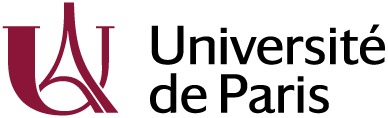
# Intro to Python - Class 4
## Sylvain Lobry, 14/11/2022

In today's class, we will see Object oriented programming with Python


## 1 Object oriented programming with Python - Simple objects

### 1.0 Definitions
Before starting, some simple definitions:

*  **Objects** are instances of **Classes**
* Classes can have **Attributes** (i.e. variables associated to the object) and **Methods** (i.e. functions associated to the object).


### 1.1 "In Python, everything is an object"
You might have heard it already (including in this course): in Python, everything is treated as an object. In that sense, it can be seen as a Pure Object Oriented Programming language (even though it supports other paradigms). So for instance, we can do:

In [1]:
a = 5
type(a)

int

In [2]:
print(a.__doc__) # Accessing an attribute of the class int

int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4


Similarly, functions, modules or even classes are objects in Python. This also explains why you can assign them to a variable, as we have seen before:

In [3]:
import math
var_to_module = math # can be assigned to variable

print(var_to_module.sqrt(9))
var_to_module.inf = 0 # objects are mutable
print(var_to_module.inf)

3.0
0


As often with Python, this allows for interesting behavior (e.g. passing a function as a parameter is a powerful feature), but can be risky if misused.

Because everything is an object in Python, you already know how to use objects: you have seen how to access an attribute (e.g. `math.pi`) or how to call a method (e.g. `a_string.split()`).
Today, we will look at how to **define** objects.

### 1.2 Defining classes

#### 1.2.1 Minimal definition & attributes
In python, a class is defined in a block by using the keyword `class` followed by the name of the class:

In [ ]:
class Image:
    #Definition

Attributes can be added directly in the block:

In [7]:
class Image:
    width = 1920
    height = 1080

To instantiate an object from class Image, we just have to write:

In [8]:
img = Image()

We can now check the type of our object, and verify that it is an instance of the class Image:

In [9]:
print(type(img))
print(isinstance(img, Image))

<class '__main__.Image'>
True


You can also list the methods and attributes of an object using the built-in dir. Let's check it for our img object:

In [10]:
dir(img)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'height',
 'width']

As you can see, a lot of methods and attributes already exist, besides the two that we just created. You can see that these elements begin with `__` (double underscore). This indicates that you *should* not use them directly.

#### 1.2.2 class vs instance attributes
As the name suggest, a class attribute is an attribute of a class while an instance attribute is an attribute of the instance. While this seems trivial, let's see how that works in practice.

In practice, an instance attribute is an attribute that exists for your instance but not for other instances of the same class. Let's have a look at the following example:

In [11]:
img = Image()
#Create an instance attribute:
img.note = "Empty image"
#Check that it is here:
print("note" in dir(img))

#Create a second instance of the same class:
img2 = Image()
#Is the instance attribute defined?
print("note" in dir(img2))

True
False


A class attribute on the other hand exists for all instances **at creation time**. Let's see what happens when we attempt to modify a class attribute for a given instance:

In [41]:
class Image:
    width = 1920 #This is a class attribute
    height = 1080 #This is a class attribute
    
img1 = Image()
img2 = Image()

img1.width = 1000
print(f"img1.width = {img1.width}")
print(f"img2.width = {img2.width}")

img1.width = 1000
img2.width = 1920


As expected, this only modifies the value of the attribute for this instance. Now we can directly modify the class attribute by accessing it from the class rather than from the instance:

In [42]:
Image.width = 2000
print(f"img1.width = {img1.width}")
print(f"img2.width = {img2.width}")

img1.width = 1000
img2.width = 2000


In this case, it only changes the value for the class attribute that was not modified. Basically, you can see it as the following way:
* When you define and initialize a class attribute, all of the instances of this class will have this attribute at the given value.
* However, if you modify the class attribute for one instance, this will turn the class attribute to an instance attribute of the same name.

As a sanity check, let's just verify that when we initialize new objects, they indeed contain the new value:

In [14]:
img1 = Image()
img2 = Image()
print(f"img1.width = {img1.width}")
print(f"img2.width = {img2.width}")

img1.width = 2000
img2.width = 2000


Now let's see a catch: what if the class attribute is a mutable type (e.g. a list). Look at the following example:

In [15]:
class Image:
    histogram = [0, 0, 0, 0]
    
img1 = Image()
img2 = Image()

As we have seen, you can modify the class attribute, it will turn to an instance attribute, and everything is the best in the best of all possible worlds right?

In [16]:
img1.histogram[0] = 100
print(img1.histogram)
print(img2.histogram) #oops

[100, 0, 0, 0]
[100, 0, 0, 0]


There the same happens as when you assign such a type to a variable. You are basically manipulating a reference, which means that you `img1.histogram` and `img2.histogram` are the same objects. As a rule of thumb, be careful when modifying class attributes at the instance level (if you need to modify it at the instance level, you probably should use an instance attribute instead) and when manipulating shared mutable types.

**Most of the attributes you need to use in Python are instance's attributes.**

#### 1.2.3 Methods
As we have seen, besides attributes a class generally contains methods. The definition of a method is close to the one of a function, for one difference: the presence of the parameters `self`

In [17]:
class Image:
    width = 1920
    height = 1080
    
    def is_defined(self):
        return False
    
img1 = Image()
img1.is_defined()

False

In this method, the parameter `self` is a reference to the instance of the class on which the method is being called on. So in the previous example, `self` was a reference to `img1`. Therefore, it can be used to access the other attributes and methods of the instance:

In [18]:
class Image:
    width = 1920
    height = 1080
    
    def get_width(self):
        return self.width
    
img1 = Image()
img1.width = 1000
print(img1.get_width())

img2 = Image()
print(img2.get_width())

1000
1920


As such, `self` must be the first parameter to a method. To better understand the syntax, note that we can re-write the previous example as:

In [19]:
img1 = Image()
img1.width = 1000
print(Image.get_width(img1))

img2 = Image()
print(Image.get_width(img2))

1000
1920


However, as a convention, the first syntax (`instance.method_name()`) should be prefered.

#### 1.2.4 Defining constructors and initializing an object

Let's look again at the list of methods and attributes in our `Image` class:

In [20]:
dir(Image)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'get_width',
 'height',
 'width']

As you can see, there are a lot of methods defined here, including the constructor. Can you guess which one it is?

**Constructor: `__new__`**

The constructor `__new__` takes the class as an argument and return a new instance of this class. It is already defined by Python (as we have seen with `dir()`) and in most cases, you do not need to re-define it (except for specific cases, e.g. to derive from an immutable type or for specific design pattern).

The actual re-definition of the method `__new__` is out of the scope of this class (even though we will see an example below). Just remember that it exisists, that this is the constructor in Python and most likely, you do not need to re-define it.

**To initialize: `__init__`**

`__init__`, also defined by default, is a method (just like the ones we have seen earlier) that is called at the initialization of an instance. As such, its first argument is `self`. There is one constraint: this method should not return anything. Let's look at an example with our class `Image`:

In [21]:
class Image:
    width = 10
    height = 5
    
    def __init__(self):
        self.data = [[0] * self.width] * self.height #Initialize a black image.
        
img = Image()
print(img.data)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


The problem with the previous example is that if we want to modify the size of the image, we need to modify class attributes. Let's add them to the argument list of `__init__`:

In [22]:
class Image: 
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.data = [[0] * self.width] * self.height #Initialize a black image.
        
img = Image(10, 20)
print(img.data)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


Note that it replace the default initialization method, and that the following syntax is not accepted anymore:

In [23]:
img = Image()

TypeError: __init__() missing 2 required positional arguments: 'width' and 'height'

Of course, you are free to assign default values to these arguments:

In [24]:
class Image: 
    def __init__(self, width=1920, height=1080):
        self.width = width
        self.height = height
        self.data = [[0] * self.width] * self.height #Initialize a black image.
        
img = Image()

As a good practice, it is recommended to define all of the instance's attributes at the begining of the `__init__` method (so they are clearly visible).

To confirm what we have been saying, let's look at an example where we define both `__new__` and `__init__`:

In [25]:
class Image: 
    def __new__(cls):
        print("Constructing my instance")
        return object.__new__(cls) #You do not need to understand this line yet
    
    def __init__(self, width=1920, height=1080):
        print("Initializing my instance")
        self.width = width
        self.height = height
        self.data = [[0] * self.width] * self.height #Initialize a black image.
        
img = Image()

Constructing my instance
Initializing my instance


First, the constructor is called and return a new instance. Then the initialization method is called and performs the initialization of the attributes.

That's it for constructing and initializing your instance. So please remember:
* `__init__` is not a constructor. This is a common mistake. The constructor is the method `__new__`.
* Most of the time, you do not need to define a constructor. However, it is often a good practice to redefine the method `__init__` if you need to make initial operations and to define instance's attributes

#### 1.2.6 Defining a finalizer

In Python, in great parts because the memory handling is made implicitely, you will not have to define a finalizer  most of the time. Note that it is not exactly a destructor as it will only be called when the object is garbage collected (not necessarly as soon as `del` is called). Although, it can be good to know how to do it.

The finalizer is named `__del__`. Here is an example for our image class.

In [26]:
class Image: 
    def __new__(cls):
        print("Constructing my instance")
        return object.__new__(cls) #You do not need to understand this line yet
    
    def __init__(self, width=1920, height=1080):
        print("Initializing my instance")
        self.width = width
        self.height = height
        self.data = [[0] * self.width] * self.height #Initialize a black image.
        
    def __del__(self):
        print("Finalizer was called")
        del self.data #This is useless, only for illustration
        
img = Image()
print("Do stuff with the image")
del img

Constructing my instance
Initializing my instance
Do stuff with the image
Finalizer was called


Basically, you should not have to use `__del__`, just as you should not have to use `__new__`. But please note that it exists.

#### 1.2.7 Printing an object
A final special method which is useful to know is the `__str__` one. This will be called when casting your object to a string. Let's look at the example below.

In [27]:
class Image:     
    def __init__(self, width=1920, height=1080):
        print("Initializing my instance")
        self.width = width
        self.height = height
        self.data = [[0] * self.width] * self.height #Initialize a black image.
        
    def __str__(self):
        return f"Image of size ({self.width} * {self.height})"

img = Image()
print(img)

Initializing my instance
Image of size (1920 * 1080)


As you can see, it is a method taking `self` as the only argument and returning a string.

#### 1.2.8 A word about privacy
In Python, attributes and methods are public, and methods are virtual (i.e. can be re-defined in modified classes).

However, by convention, any attribute or member with a name starting with an `_` should be considered as private: while the program will not forbid you to access it, the developer of the class is, by convention, asking you not to do it.

Furthermore, there is a mechanism of name mangling to discourage accessing a variable. In practice, any data of the class with a name starting with at least two `_` will have its name replaced by `_classnameoriginalname` when accessed from outside of the class. See the following example

In [28]:
class Test:
    _please_do_not = 42
    ___tricking_you = 21
    def peek(self):
        print(self.___tricking_you)

t = Test()
print(f"t._please_do_not = {t._please_do_not}") #You can, but should not
print(f"t._Test___tricking_you = {t._Test___tricking_you}") #t.___tricking_you will give you an error
t.peek()

t._please_do_not = 42
t._Test___tricking_you = 21
21


Therefore, the following is totally valid...

In [29]:
class Image:     
    def __init__(self, width=1920, height=1080):
        print("Initializing my instance")
        self.width = width
        self.height = height
        self.data = [[0] * self.width] * self.height #Initialize a black image.
        
    def __str__(self):
        return f"Image of size ({self.width} * {self.height})"
    
img = Image()
img.width = -1
print(img)

Initializing my instance
Image of size (-1 * 1080)


I am sure you agree this is problematic. In other languages, you would define the attribute width as private, and define public getter and setter methods to access the attributes (and for instance, check that the width is greater than 0 before assigning). In python, that would look like that:

In [30]:
class Image:     
    def __init__(self, width=1920, height=1080):
        print("Initializing my instance")
        #Note the __ at the begining of the attributes' names.
        self.__width = width
        self.__height = height
        self.__data = [[0] * self.__width] * self.__height #Initialize a black image.
        
    def get_width(self):
        return self.__width
    
    def set_width(self, width):
        if width > 0:
            self.__width = width
            
    def get_height(self):
        return self.__height
    
    def set_height(self, height):
        if height > 0:
            self.__height = height
            
    def get_data(self):
        return self.__data
    
    def set_data(self, data):
        self.__data = data
        
    def __str__(self):
        return f"Image of size ({self.__width} * {self.__height})"

However, you will agree that:
* it is not nice to use (and to write, but you only have to do it once)
* most imortantly, we did not solve the problem. The following code is still valid

In [31]:
img = Image()
img._Image__width = -1
print(img)

Initializing my instance
Image of size (-1 * 1080)


This can be avoided using `property`, a built-in class offered by Python. Let's look at an example:

In [32]:
class Image:     
    def __init__(self, width=1920, height=1080):
        print("Initializing my instance")
        #Note the __ at the begining of the attributes' names.
        self.__width = width
        self.__height = height
        self.__data = [[0] * self.__width] * self.__height #Initialize a black image.
        
    def get_width(self):
        return self.__width
    
    def set_width(self, width):
        if width > 0:
            self.__width = width
            
    def get_height(self):
        print("In height getter")
        return self.__height
    
    def set_height(self, height):
        if height > 0:
            self.__height = height
            
    def get_data(self):
        return self.__data
    
    def set_data(self, data):
        self.__data = data
            
    width = property(get_width, set_width)
    height = property(get_height, set_height)
    data = property(get_data, set_data)
        
    def __str__(self):
        return f"Image of size ({self.__width} * {self.__height})"
    
img = Image()
print(img.height)
print(img.get_height())

Initializing my instance
In height getter
1080
In height getter
1080


As you can see, `property` defined the function to be called when accessing or assigning to the variables `height`, `width` and `data`. However, there is a problem: we have seen that there are now two valid ways to access a variable. Either by the name defined by the property, or by the getter/setter. This is in contradiction with the Zen of Python which says "There should be oneâ€” and preferably only one â€”obvious way to do it.".

To solve that, let's indicate our getters/setters as private: 

In [33]:
class Image:     
    def __init__(self, width=1920, height=1080):
        print("Initializing my instance")
        #Note the __ at the begining of the attributes' names.
        self.width = width
        self.height = height
        self.data = [[0] * self.__width] * self.__height #Initialize a black image.
        
    def __get_width(self):
        print("In width getter")
        return self.__width
    
    def __set_width(self, width):
        print("In width setter")
        if width > 0:
            self.__width = width
            
    def __get_height(self):
        print("In height getter")
        return self.__height
    
    def __set_height(self, height):
        print("In height setter")
        if height > 0:
            self.__height = height
            
    def __get_data(self):
        print("In data getter")
        return self.__data
    
    def __set_data(self, data):
        print("In data setter")
        self.__data = data
            
    width = property(__get_width, __set_width)
    height = property(__get_height, __set_height)
    data = property(__get_data, __set_data)
        
    def __str__(self):
        return f"Image of size ({self.width} * {self.height})"

print("Initialization of the object:")
img = Image()

print("\nModification of width")
img.width=3840

print("\nModification of height to an invalid value")
img.height=-100

print("\nPrinting")
print(img)

Initialization of the object:
Initializing my instance
In width setter
In height setter
In data setter

Modification of width
In width setter

Modification of height to an invalid value
In height setter

Printing
In width getter
In height getter
Image of size (3840 * 1080)


Note that this is not the prettiest way to do it (people tend to use "decorators" for that). However, this goes beyond the scope of this class.

**Summary**

We have seen how to define a simple object and some useful methods associated to it. To summarize, you should know:
* how to define an attribute (and the difference between class and instance attributes)
* how to define a method
* how to define the `__init__` method to initialize the class and the `__str__` method to obtain a string representation of an object
* that the `__new__` and `__del__` method exists but that you should avoid to use them

As you have seen with `dir()`, there are other default methods that come with an object. We will obviously not go through all of them, but if you need to define one in particular (e.g. for operator overloading), you can look at the [documentation](https://docs.python.org/3/reference/datamodel.html)

## 2 Object oriented programming with Python - Inheritance

One of the main interest of OOP is inheritance, which allows for clear design of your program. In Python inheritance is simply defined by adding `(parentclass)` after the name of the class

In [34]:
class Image: 
    def __init__(self, width=1920, height=1080):
        self.width = width
        self.height = height
        
class RGBImage(Image):
    pass

With that, the class `RGBImage` inherits from the methods and attributes of the `Image` class:

In [35]:
img = RGBImage()
img.width

1920

Note that Python also supports multiple inheritance. In that case, you should use the syntax `(ParentClass1, ParentClass2)`

We can now see the difference between the built-in `type()` and `isinstance()`:

In [36]:
img1 = Image()
img2 = RGBImage()

print("With type():")
print(type(img2) == Image)

print("With isinstance():")
print(isinstance(img2, Image))

With type():
False
With isinstance():
True


**Initialization of a derived class**

When initializing a derived class, it is often a good idea to also initialize the parent class. To realize that, let's take our previous example and add an initialization to the derived class

In [37]:
class Image: 
    def __init__(self, width=1920, height=1080):
        self.width = width
        self.height = height
        
class RGBImage(Image):
    def __init__(self, width=1280, height=720):
        #First option: recreate the variable self.width and self.height... But why bother having inheritance then?
        #Option two:
        Image.__init__(self, width, height)
        #Or (equivalent)
        #super().__init__(width, height)

img = RGBImage()
print(img.width)

1280


Here, `super()` will automatically return the parent class [(link for multiple inheritance).](http://python-history.blogspot.com/2010/06/method-resolution-order.html)

Of course, you are free to write other instructions in the initialization:

In [38]:
class Image: 
    def __init__(self, width=1920, height=1080):
        self.width = width
        self.height = height
        
class RGBImage(Image):
    def __init__(self, width=1280, height=720):
        Image.__init__(self, width, height)
        self.data = [[0, 0, 0] * width] * height

img = RGBImage()
print(img.width)

1280


**Overriding**

You will probably have to override some methods when defining hierarchies of classes. This is simply done by re-defining the function:

In [39]:
class Image: 
    def __init__(self, width=1920, height=1080):
        self.width = width
        self.height = height
        
    def get_size(self):
        return f"{self.width} * {self.height}"
        
class RGBImage(Image):
    def __init__(self, width=1280, height=720):
        Image.__init__(self, width, height)
        self.data = [[0, 0, 0] * width] * height
        
    def get_size(self):
        return f"{self.width} * {self.height} * 3"

img = RGBImage()
print(img.get_size())

img = Image()
print(img.get_size())

1280 * 720 * 3
1920 * 1080


Once again, you can use the `super()` function to access the overriden method:

In [40]:
class Image: 
    def __init__(self, width=1920, height=1080):
        self.width = width
        self.height = height
        
    def get_size(self):
        return f"{self.width} * {self.height}"
        
class RGBImage(Image):
    def __init__(self, width=1280, height=720):
        Image.__init__(self, width, height)
        self.data = [[0, 0, 0] * width] * height
        
    def get_size(self):
        return super().get_size() + " * 3"

img = RGBImage()
print(img.get_size())

img = Image()
print(img.get_size())

1280 * 720 * 3
1920 * 1080


## Questions?